In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_0 = [26,28,35,42,51,46,54,69,76,82]
y = [0,0,0,0,0,1,1,1,1,1]
X = np.c_[x_0, np.ones(10)]

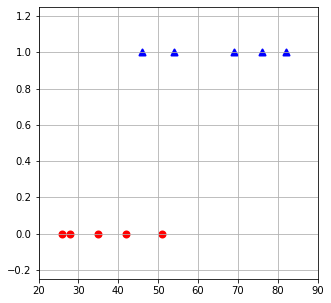

In [3]:
x_0_f = []
x_0_m = []
y_f = np.zeros((1,5))
y_m = np.ones((1,5))
for i in range(10):
    if y[i] == 0:
        x_0_f.append(x_0[i])
    if y[i] == 1:
        x_0_m.append(x_0[i])
        
plt.figure(figsize = (8,8))
plt.scatter(x_0_f,y_f, c='r',marker='o', linewidths=2)
plt.scatter(x_0_m,y_m,c='b',marker='^',linewidths=2)
plt.xlim(20, 90)
plt.ylim(-0.25,1.25)
plt.grid(True)
plt.show()

In [4]:
def numerucal_gradient(f,W,X,y):
    h = 1e-4
    grad = np.zeros_like(W)
    for idx in range(W.size):
        tmp_val = W[idx]

        W[idx] = tmp_val+h
        fxh1 = f(W,X,y)

        W[idx] = tmp_val-h
        fxh2 = f(W,X,y)    

        grad[idx] = (fxh1-fxh2)/(2*h)
        W[idx] = tmp_val
    return grad

In [5]:
def fucntion_MSE(W,X,y):
    mse = np.zeros(len(X))
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T,X[idx])-y[idx])**2
    mse = np.sum(mse)/len(X)
    return mse

In [6]:
analytic_W = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(analytic_W)

[ 0.02110687 -0.57433986]


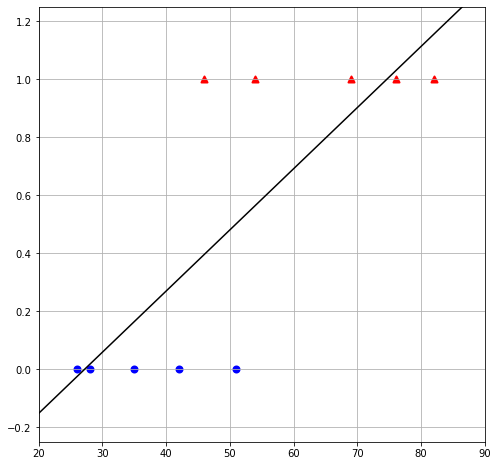

In [7]:
pred_rate = np.linspace(20,90,100)
pred_y = analytic_W[0]*pred_rate+analytic_W[1]

plt.figure(figsize = (8,8))
plt.scatter(x_0_f,y_f, c='b',marker='o', linewidths=2)
plt.scatter(x_0_m,y_m,c='r',marker='^',linewidths=2)
plt.plot(pred_rate,pred_y,c='k')
plt.xlim(20, 90)
plt.ylim(-0.25,1.25)
plt.grid(True)
plt.show()

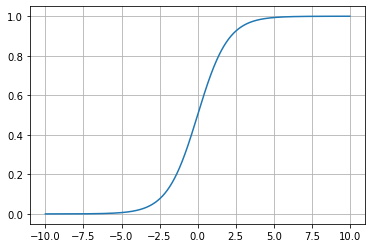

In [8]:
def logistic(x):
    log_x = 1/(1+np.exp(-x))
    return log_x

t = np.linspace(-10,10,1000)
plt.plot(t,logistic(t))
plt.grid(True)

In [9]:
num_epoch=100000
eta = 0.00001

### random data ###
## random data로 돌릴 땐 sample data 주석 후 경사 하강법 적용시키는 for문 사용해주세요 ##
# 너무 random하게 했더니 데이터 오차율 커서 범위 적당히 지정 #
GD_W = np.zeros((2,1))
GD_W[0] = np.random.uniform(low=0, high=10)
GD_W[1] = np.random.uniform(low=-10.0, high=0)


### sample data ###
## sample data로 돌릴 땐 경사 하강법 적용시키는 for 문 주석처리 해주세요 ##

#GD_W = analytic_W
#GD_W[0] = 0.1894
#GD_W[1] = -9.1848


for epoch in range(num_epoch):
    mse = fucntion_MSE(GD_W, X, y)
    if mse < 0.00001:
        break
    GD_W = GD_W - eta*numerucal_gradient(fucntion_MSE,GD_W,X,y)
    if epoch%10000 == 0:
        print(f'epoch:{epoch}, mse:{mse}')

z = np.zeros((10,1))
for j in range(10):
    z[j] = GD_W[0]*x_0[j]+GD_W[1]
p_n = logistic(z)

y_hat = np.zeros((10,1))
for k in range(10):
    if p_n[k]>=0.5:
        y_hat[k] = 1
    else:
        y_hat[k] = 0

acc = 0
for l in range(10):
    if y[l]==y_hat[l]:
        acc = acc+10
        
prod = 1
for m in range(10):
    prod = prod*(p_n[m]**y_hat[m])*((1-p_n[m])**(1-y_hat[m]))

epoch:0, mse:54.06539532199605
epoch:10000, mse:8.465066350683498
epoch:20000, mse:8.271000181481728
epoch:30000, mse:8.081429053165376
epoch:40000, mse:7.896248914972588
epoch:50000, mse:7.715358123940051
epoch:60000, mse:7.538657389194475
epoch:70000, mse:7.3660497175314585
epoch:80000, mse:7.1974403602548005
epoch:90000, mse:7.032736761244751


In [10]:
print(f'훈련결과, 정확도 {acc}%')
print(f'w0 = {float(GD_W[0])}, w1 = {float(GD_W[1])}')
print(f'가능도 = {prod}')

훈련결과, 정확도 90%
w0 = 0.15302718689670478, w1 = -8.18190378013549
가능도 = [0.15931638]


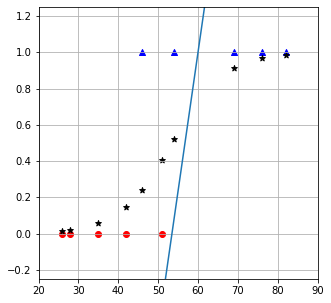

In [11]:
weight = np.linspace(20,90,100)
Z = GD_W[0]*weight+GD_W[1]

plt.figure(figsize = (5,5))
plt.scatter(x_0_f,y_f, c='r',marker='o')
plt.scatter(x_0_m,y_m,c='b',marker='^')
plt.scatter(x_0,p_n,c='k',marker='*')
plt.plot(weight,Z)
plt.xlim(20, 90)
plt.ylim(-0.25,1.25)
plt.grid(True)
plt.show()